# A Fully-Connected Binarized Network on GTSRB

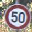

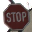

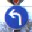

(3072,)


In [11]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# define a small utility function to first display, then prepare the
# images for classification
def prepare_gtsrb(img):
    # make sure the image is the size expected by the network
    img = img.resize((32, 32))
    display(img)
    # convert to numpy array
    img = np.asarray(img)
    # we need the data layout to be (channels, rows, columns)
    # but it comes in (rows, columns, channels) format, so we
    # need to transpose the axes:
    img = img.transpose((2, 0, 1))
    # finally, our network is trained with BGR instead of RGB images,
    # so we need to invert the order of channels in the channel axis:
    img = img[::-1, :, :]
    img = img.flatten()
    return img

# load test images and prepare them
img_50 = prepare_gtsrb(Image.open("gtsrb_images/50.jpg"))
img_stop = prepare_gtsrb(Image.open("gtsrb_images/stop.jpg"))
img_left = prepare_gtsrb(Image.open("gtsrb_images/left.jpg"))
img_right = prepare_gtsrb(Image.open("gtsrb_images/right.jpg"))

# print the shape of one of the images to make sure it's correct
print(img_50.shape)

In [25]:
from QNN.layers import *
import pickle

# load the QNN
qnn = pickle.load(open("gtsrb-w1a1-fc.pickle", "rb"))
qnn

In [30]:
qnn[0].W

array([[ 1,  1, -1, ..., -1,  1, -1],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 1,  1,  1, ...,  1, -1,  1],
       ..., 
       [ 1,  1, -1, ..., -1, -1,  1],
       [-1, -1, -1, ..., -1, -1, -1],
       [ 1,  1, -1, ...,  1,  1,  1]], dtype=int8)

In [31]:
qnn[1].thresholds

array([[  184,   458,   -59,   513,   108,    62,  -472,   391,   202,
          -89,   675,   208,   -89,   137,   274,  -220,   516,  -241,
          385,   570,  -731,  -488,   108,    22,  -672,   -12,    45,
          170,  -209,   363,   102,   117,    86,   227,  -552,   508,
         -442,   227,  -392,   213,   215,   225,  -256, -1207,   209,
          -82,    42,   481,   183,   319,   296,   541,  -105,    58,
         -663,  -333,   614,   572,   592,   -35,   238,    66,    95,
         -279,  -279,   251,  -384,   386,  -834,  -103,  -382,   333,
         -156,  -447,   181,   -76,  -616,   690,  -290,  -163,    61,
          -36,   373,  -457,    91,   489,  -527,   197,   -72,  -531,
          132,   282,  -499,   173,   248,     2,   167,   394,   301,
          253,   732,  -325,  -670,   767,   234,   -84,  -322,   155,
           35,  -179,   353,  -187,    29,   367,  -163,   164,   143,
         -593,   926,    52,   251,    47,     1,   756,   456,  -291,
      

In [32]:
qnn[2].W

array([[ 1, -1,  1, ..., -1,  1,  1],
       [ 1, -1,  1, ...,  1, -1,  1],
       [ 1, -1, -1, ...,  1,  1, -1],
       ..., 
       [-1,  1,  1, ..., -1, -1,  1],
       [ 1,  1,  1, ...,  1, -1, -1],
       [-1,  1,  1, ..., -1, -1,  1]], dtype=int8)

In [27]:
gtsrb_classes = ['20 Km/h', '30 Km/h', '50 Km/h', '60 Km/h', '70 Km/h', '80 Km/h', 'End 80 Km/h', '100 Km/h', '120 Km/h', 'No overtaking', 'No overtaking for large trucks', 'Priority crossroad', 'Priority road', 'Give way', 'Stop', 'No vehicles', 'Prohibited for vehicles with a permitted gross weight over 3.5t including their trailers, and for tractors except passenger cars and buses', 'No entry for vehicular traffic', 'Danger Ahead', 'Bend to left', 'Bend to right', 'Double bend (first to left)', 'Uneven road', 'Road slippery when wet or dirty', 'Road narrows (right)', 'Road works', 'Traffic signals', 'Pedestrians in road ahead', 'Children crossing ahead', 'Bicycles prohibited', 'Risk of snow or ice', 'Wild animals', 'End of all speed and overtaking restrictions', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Ahead or right only', 'Ahead or left only', 'Pass by on right', 'Pass by on left', 'Roundabout', 'End of no-overtaking zone', 'End of no-overtaking zone for vehicles with a permitted gross weight over 3.5t including their trailers, and for tractors except passenger cars and buses']

def gtsrb_predict(img):
    # get the predictions array
    res = predict(qnn, img)
    # return the index of the largest prediction, then use the
    # classes array to map to a human-readable string
    winner_ind = np.argmax(res)
    winner_class = gtsrb_classes[winner_ind]
    # the sum of the output values add up to 1 due to softmax,
    # so we can interpret them as probabilities
    winner_prob = 100 * res[winner_ind]
    print("The QNN predicts this is a %s sign with %f percent probability" % (winner_class, winner_prob))

gtsrb_predict(img_50)
gtsrb_predict(img_stop)
gtsrb_predict(img_left)
gtsrb_predict(img_right)

The QNN predicts this is a 50 Km/h sign with 99.969233 percent probability
The QNN predicts this is a Stop sign with 83.005663 percent probability
The QNN predicts this is a Turn left ahead sign with 99.986690 percent probability
The QNN predicts this is a Turn right ahead sign with 99.941609 percent probability
